# Aula: Desvendando a Árvore de Decisão

Olá! Seja bem-vindo(a) ao seu guia sobre um dos algoritmos mais intuitivos e poderosos do Machine Learning: a **Árvore de Decisão**.

Nesta aula, vamos construir o conhecimento passo a passo. O foco é entender a **lógica** e a **matemática** por trás do modelo antes de implementarmos o código. Vamos lá!

## 1. A Intuição: Como Tomamos Decisões?

A Árvore de Decisão funciona de uma maneira muito parecida com o nosso cérebro ao tomar decisões. Pense no processo para decidir se você vai a uma festa ou não:

<img src='arvore.png' width='400'/>

1.  A primeira pergunta poderia ser: *"Tenho outro compromisso?"* Se **sim**, a decisão está tomada: **Não vou**. 
2.  Se **não**, uma segunda pergunta surge: *"A festa é na minha cidade?"* Se **não**, a decisão é: **Não vou**.
3.  Se **sim**, uma terceira pergunta: *"Tenho dinheiro?"* E assim por diante.

Cada pergunta é um **"nó"** da nossa árvore, e cada resposta nos leva a um novo ramo, até chegarmos em uma decisão final, que é a **"folha"** da árvore.

O algoritmo de Árvore de Decisão aprende sozinho a fazer as **melhores perguntas** e na **melhor ordem** para separar os dados e chegar a uma conclusão.

## 2. O Objetivo do Algoritmo: Encontrar a Pureza

Para saber qual é a "melhor pergunta", o algoritmo precisa de um objetivo. O objetivo é criar grupos (nós) o mais **"puros"** possível.

Imagine uma caixa com 10 bolas, 5 azuis e 5 vermelhas. Essa caixa é **impura**, pois tem uma mistura perfeita. Agora, se uma pergunta (ex: "A bola é lisa?") consegue separar essas bolas em duas caixas, uma com 4 azuis e 1 vermelha, e outra com 4 vermelhas e 1 azul, nós aumentamos a pureza dos grupos!

- **Alta Impureza**: Um nó com 50% de "Sim" e 50% de "Não".
- **Alta Pureza**: Um nó com 95% de "Sim" e 5% de "Não".
- **Pureza Total**: Um nó com 100% de "Sim" (ou 100% de "Não"). A impureza é zero.

## 3. A Ferramenta de Medida: O Índice Gini

Para medir a impureza, o algoritmo usa uma fórmula matemática. A mais comum é o **Índice Gini**. Ele mede qual a probabilidade de classificarmos errado um item aleatório daquele nó.

A fórmula é:
$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Onde:
- **C** é o número total de classes (ex: "Sim" e "Não", então C=2).
- **$p_i$** é a proporção de cada classe no nó.

O valor do Gini varia de **0** (totalmente puro) a **0.5** (totalmente impuro, para 2 classes). O algoritmo buscará a pergunta que resulta no **menor Gini possível**.

## 4. Exemplo 'Mão na Massa': Doença Cardíaca

Vamos usar um pequeno dataset para calcular na mão como a árvore escolhe a primeira pergunta. Nosso objetivo é prever `Doença Cardíaca`.

| ID | Fumante | Idade | Doença Cardíaca |
| -- | ------- | ----- | --------------- |
| 4  | Não     | 35    | Não             |
| 2  | Não     | 40    | Não             |
| 5  | Sim     | 45    | Não             |
| 1  | Sim     | 55    | Sim             |
| 3  | Sim     | 60    | Sim             |
| 6  | Não     | 70    | Sim             |




No nosso dataset inicial (nó raiz), temos 3 exemplos: **3 "Sim"** e **3 "Não"**.

In [10]:
gini_375 = 1/6 *(1 - (1/1)**2 - (0/1)**2) + 5/6 * (1-(2/5)**2 - (3/5)**2)
gini_425 = 2/6 *(1 - (2/2)**2 - (0/2)**2) + 4/6 * (1-(1/4)**2 - (3/4)**2)
gini_50  = 3/6 *(1 - (3/3)**2 - (0/3)**2) + 3/6 * (1-(0/3)**2 - (3/3)**2)
gini_575 =  4/6 *(1 - (3/4)**2 - (1/4)**2) + 2/6 * (1-(2/2)**2 - (0/2)**2)
gini_65 =  5/6 *(1 - (3/5)**2 - (2/5)**2) + 1/6 * (1-(1/1)**2 - (0/1)**2)

print('gini_375: ',gini_375)
print('gini_425: ',gini_425)
print('gini_50: ',gini_50)
print('gini_575: ',gini_575)
print('gini_65: ',gini_65)

gini_375:  0.4
gini_425:  0.25
gini_50:  0.0
gini_575:  0.25
gini_65:  0.4


| Corte (Idade ≤) | Gini esquerda | Gini direita | Gini total |
| --------------- | ------------- | ------------ | ---------- |
| 37.5            | 0.0           | 0.48         | 0.40       |
| 42.5            | 0.0           | 0.375        | 0.25       |
| 50.0            | 0.0           | 0.0          | 0          |
| 57.5            | 0.375         | 0.0          | 0.25       |
| 65.0            | 0.48          | 0.0          | 0.40       |


## 5. Exemplo Prático em Python

Agora que entendemos a lógica, vamos ver como a biblioteca `scikit-learn` faz todo esse trabalho para nós. Usaremos o mesmo dataset de exemplo.

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Criando o DataFrame
dados = {
    'Fumante': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não'],
    'Idade': [35, 40, 45, 55, 60, 70],
    'DoencaCardiaca': ['Não', 'Não', 'Não', 'Sim', 'Sim', 'Sim']
}

df = pd.DataFrame(dados)


In [13]:
df

,Fumante,Idade,DoencaCardiaca
0,Não,35,Não
1,Não,40,Não
2,Sim,45,Não
3,Sim,55,Sim
4,Sim,60,Sim
5,Não,70,Sim


In [14]:
# Ajustando as variáveis categóricas
df.Fumante = df.Fumante.map({'Sim': 1,  'Não': 0 })
df.DoencaCardiaca = df.DoencaCardiaca.map({'Sim': 1,  'Não': 0 })

In [15]:
df

,Fumante,Idade,DoencaCardiaca
0,0,35,0
1,0,40,0
2,1,45,0
3,1,55,1
4,1,60,1
5,0,70,1


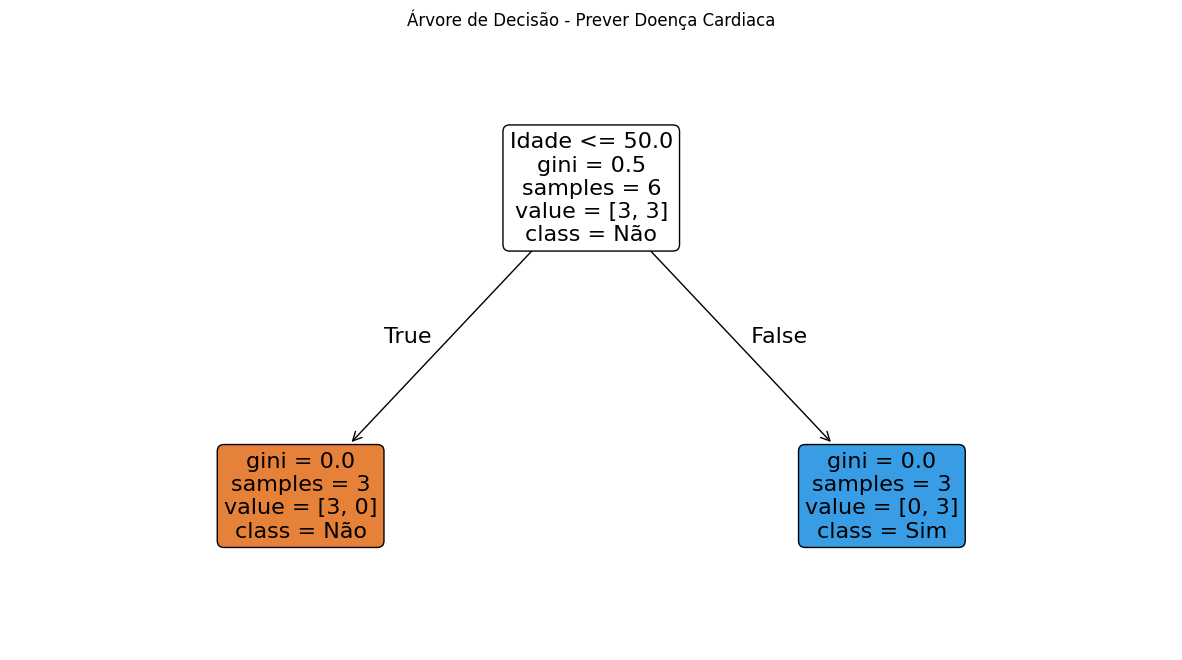

In [ ]:

#Separando X e y
X = df[['Fumante', 'Idade']]
y = df['DoencaCardiaca']

#Separando os nomes das features
feature_names=X.columns


# 3. Treinando o Modelo de Árvore de Decisão
# Usamos criterion='gini' para replicar nosso cálculo manual.
tree_model = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_model.fit(X,y)


# 4. Visualizando a Árvore
plt.figure(figsize=(15, 8))

plot_tree(tree_model, 
          feature_names=feature_names, 
          class_names=['Não', 'Sim'], 
          filled=True, 
          rounded=True,
          fontsize=16)
plt.title("Árvore de Decisão - Prever Doença Cardiaca")
plt.show()

## 6. Cuidado com o Overfitting!

Uma árvore de decisão, por padrão, tentará crescer até que todos os nós sejam 100% puros. Em dados reais, isso quase sempre leva ao **overfitting**: o modelo decora perfeitamente os dados de treino, mas não consegue generalizar para novos dados.

Para controlar isso, usamos **hiperparâmetros**, que são como as "regras" que damos ao modelo. Os mais importantes são:

- **`max_depth`**: A profundidade máxima da árvore. Limita quantas "camadas" de perguntas a árvore pode fazer. Um valor menor (ex: 3 ou 4) cria uma árvore mais simples e que generaliza melhor.

- **`min_samples_split`**: O número mínimo de amostras que um nó deve ter para poder ser dividido. Se um nó tem menos amostras que esse valor, ele vira uma folha, mesmo que não seja puro. Isso evita que a árvore crie nós para aprender com pouquíssimos exemplos.

- **`min_samples_leaf`**: O número mínimo de amostras que cada nó folha (a decisão final) deve ter. Garante que nossas conclusões sejam baseadas em um número razoável de exemplos.

## Conclusão e Próximos Passos

Parabéns! Você desvendou a lógica por trás de um dos modelos mais importantes de Machine Learning.

**Principais aprendizados:**
1. A Árvore de Decisão imita o raciocínio humano, fazendo perguntas sequenciais.
2. O objetivo é reduzir a **impureza** dos dados a cada pergunta.
3. O **Índice Gini** é a fórmula que mede essa impureza e guia a árvore na escolha da melhor pergunta.
4. É fundamental controlar a complexidade da árvore com hiperparâmetros para evitar o overfitting.

Ficou alguma dúvida? O que você gostaria de explorar a seguir? Talvez como a árvore funciona para problemas de regressão ou como ela lida com variáveis numéricas contínuas?